**CUSTOMER CHURN PREDICTION**

**BUSINESS PROBLEM**

Business problem is very simple, There is a Bank who wants to 
retain their existing customers who may churn, for that they have to 
know which existing customers has the highest probability of 
leaving the company and which customers have lowest probability 
of leaving the company.

Churning of customers is a big problem for banks, they want to 
maximise the retention of the customers so that they can plan their 
future projects. 

Also if a Bank wants to get a funding from big investors, Rate of 
churning plays an important role.

So Bank wants to build a Machine Learning model which can 
predict whether a particular customer will churn or not.

**Data**

We have 10000 rows with 13 features and 1 target variable, Every 
row tells us different customer details and whether they have 
churned or not.

In [1]:
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.utils import class_weight
import warnings
warnings.filterwarnings("ignore")
import imblearn
from sklearn import svm



In [2]:
#import pandas as pd
#df=pd.read_csv("Churn_Modelling.csv")
from google.colab import files


##uploaded = files.upload()
import pandas as pd
import io
  
df = pd.read_csv('Churn_Modelling.csv')
print(df)


      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [3]:
print(display(df))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


None


Understanding the data and manipulation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)

Number of data points :  10000
Number of features :  14
Features :  ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


In [6]:
# checking the missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observation**

It seems there is no missing values

In [7]:
#checking the duplicates values
duplicate = df[df.duplicated()]
duplicate.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Observation**

No duplicates

In [8]:
df['Exited'].value_counts() #geting the number of values

0    7963
1    2037
Name: Exited, dtype: int64

Imbalanced data

It seems that data is imbalanced, as number of "yes" is 2037 and number of "no" is 7963, we will balanced the data with upsampling

Exploratory data analysis/ Data Visualization

This will include-

univariate analysis(histograms/bar plots/ pdf/cdf/box plots/violin plots)

bivariate analysis(scatter plots and pair plots)

There are 13 features so we also need to see which features are not at all helping in classification. we surely know that customerID is of no use

In [9]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Surname','Exited']].groupby('Surname').mean()

,Exited
Surname,
Abazu,0.00
Abbie,0.00
Abbott,0.25
Abdullah,1.00
Abdulov,0.00
...,...
Zubarev,0.00
Zubareva,0.00
Zuev,0.00


Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Morton       1
Selwyn       1
Root         1
Denisova     1
Meany        1
Name: Surname, Length: 2932, dtype: int64


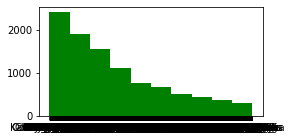

,Exited
Surname,
Abazu,0
Abbie,0
Abbott,1
Abdullah,1
Abdulov,0
...,...
Zubarev,0
Zubareva,0
Zuev,0


In [10]:
#lets see variable one by one
#Surname 
#bivariate analysis

count=df['Surname'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Surname'],facecolor='g')
plt.show()
df[['Surname','Exited']].groupby('Surname').sum()

There is a difference in number of Surnames.


850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64


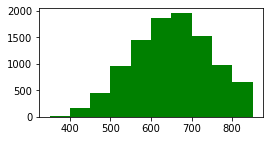

,Exited
CreditScore,
350,5
351,1
358,1
359,1
363,1
...,...
846,2
847,2
848,0


In [11]:
#second variable is CreditScore
count=df['CreditScore'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['CreditScore'],facecolor='g')
plt.show()
df1[['CreditScore','Exited']].groupby('CreditScore').sum()

In [12]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['CreditScore','Exited']].groupby('CreditScore').mean()

,Exited
CreditScore,
350,1.000000
351,1.000000
358,1.000000
359,1.000000
363,1.000000
...,...
846,0.400000
847,0.333333
848,0.000000


650.5288
652.0
718.0
578.0
716.0


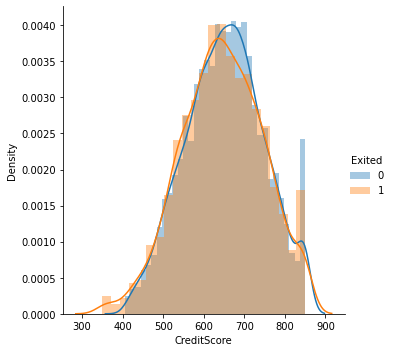

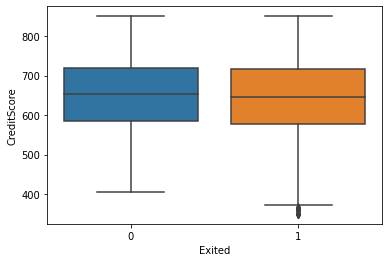

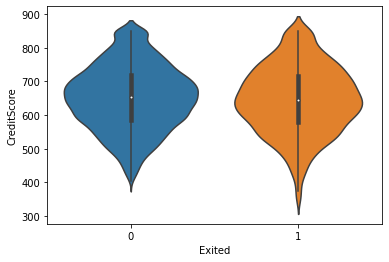

In [13]:
a=np.mean(df1.CreditScore)
print(a)
b=np.median(df1.CreditScore)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['CreditScore'],75)
print(c)
#75% of CreditScore which belongs to the people who exited the bank lies below 718
d=np.percentile(sb['CreditScore'],25)
print(d)
#25% of CreditScore which belongs to the people who exited the bank lies below 578
e=np.percentile(sb['CreditScore'],75)
print(e)
#75% of CreditScore which belongs to the people who exited the bank lies below 716
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "CreditScore",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='CreditScore', data=df)
plt.show()

sns.violinplot(x='Exited',y='CreditScore', data=df)
plt.show()

**Observation**

75% of Tenure which belongs to the people who exited the bank lies below 718.0

25% of Tenure which belongs to the people who exited the bank lies below 578.0

75% of Tenure which belongs to the people who exited the bank lies below 716.0

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


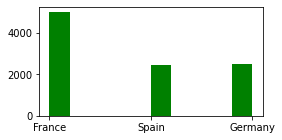

,Exited
Geography,
France,810
Germany,814
Spain,413


In [14]:
count=df['Geography'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Geography'],facecolor='g')
plt.show()
df1[['Geography','Exited']].groupby('Geography').sum()

In [15]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Geography','Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


Male      5457
Female    4543
Name: Gender, dtype: int64


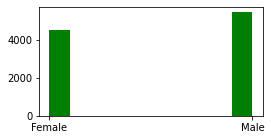

,Exited
Gender,
Female,1139
Male,898


In [16]:
count=df['Gender'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Gender'],facecolor='g')
plt.show()
df1[['Gender','Exited']].groupby('Gender').sum()

In [17]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Gender','Exited']].groupby('Gender').mean()

,Exited
Gender,
Female,0.250715
Male,0.164559


37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


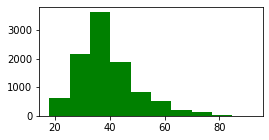

,Exited
Age,
18,2
19,1
20,2
21,3
22,12
...,...
83,0
84,1
85,0


In [18]:
count=df['Age'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Age'],facecolor='g')
plt.show()
df1[['Age','Exited']].groupby('Age').sum()

**Observation**

Mean values are not same that mean it is contributing to pretict churning so we take Age as a feature value.

In [19]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Age','Exited']].groupby('Age').mean()

,Exited
Age,
18,0.090909
19,0.037037
20,0.050000
21,0.056604
22,0.142857
...,...
83,0.000000
84,0.500000
85,0.000000


38.9218
37.0
41.0
38.0
51.0


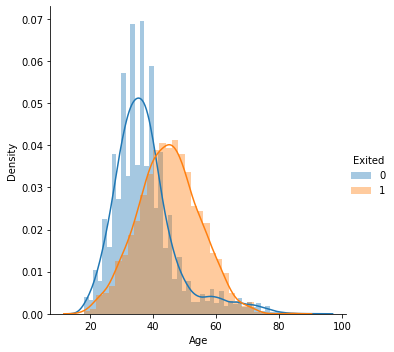

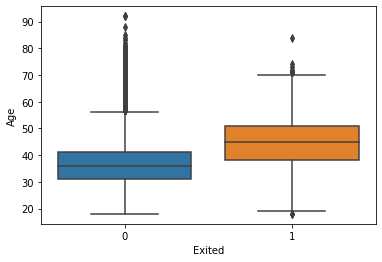

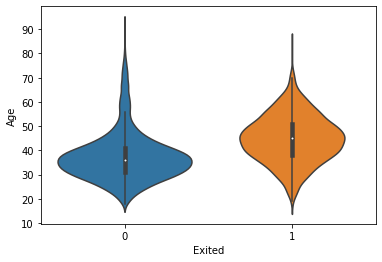

In [20]:
a=np.mean(df1.Age)
print(a)#mean
b=np.median(df1.Age)
print(b)#median

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['Age'],75)
print(c)
#75% of Age which belongs to the people who exited the bank lies below 41

d=np.percentile(sb['Age'],25)
print(d)
#25% of Age which belongs to the people who exited the bank lies below 38
e=np.percentile(sb['Age'],75)
print(e)
#75% of Age which belongs to the people who exited the bank lies below 51
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Age",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='Age', data=df)
plt.show()

sns.violinplot(x='Exited',y='Age', data=df)
plt.show()

**Observation**

75% of Tenure which belongs to the people who exited the bank lies below 41.0

25% of Tenure which belongs to the people who exited the bank lies below 38.0

75% of Tenure which belongs to the people who exited the bank lies below 51.0

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


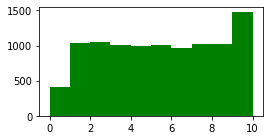

,Exited
Tenure,
0,95
1,232
2,201
3,213
4,203
5,209
6,196
7,177
8,197


In [21]:
count=df['Tenure'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Tenure'],facecolor='g')
plt.show()
df1[['Tenure','Exited']].groupby('Tenure').sum()

In [22]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Tenure','Exited']].groupby('Tenure').mean()

,Exited
Tenure,
0,0.230024
1,0.224155
2,0.191794
3,0.211100
4,0.205258
5,0.206522
6,0.202689
7,0.172179
8,0.192195


5.0128
5.0
7.0
2.0
8.0


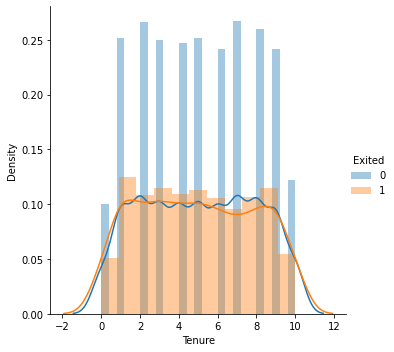

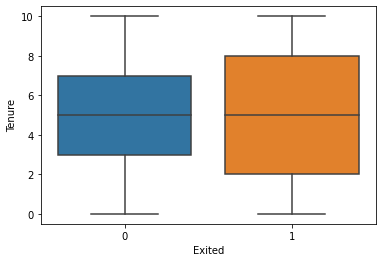

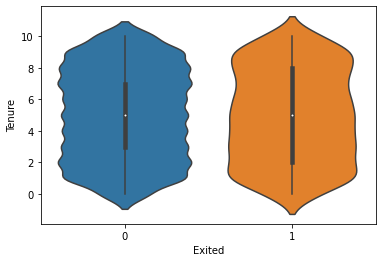

In [23]:

a=np.mean(df1.Tenure)
print(a)
b=np.median(df1.Tenure)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['Tenure'],75)
print(c)
#75% of Tenure which belongs to the people who exited the bank lies below 7
d=np.percentile(sb['Tenure'],25)
print(d)
#25% of Tenure which belongs to the people who exited the bank lies below 2
e=np.percentile(sb['Tenure'],75)
print(e)
#75% of Tenure which belongs to the people who exited the bank lies below 8
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Tenure",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='Tenure', data=df)
plt.show()

sns.violinplot(x='Exited',y='Tenure', data=df)
plt.show()


Observation

75% of Tenure which belongs to the people who exited the bank lies below 7.0

25% of Tenure which belongs to the people who exited the bank lies below 2.0

75% of Tenure which belongs to the people who exited the bank lies below 8.0

0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64


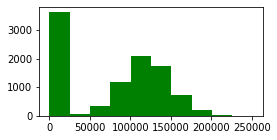

,Exited
Balance,
0.00,500
3768.69,1
12459.19,1
14262.80,0
16893.59,0
...,...
216109.88,1
221532.80,0
222267.63,1


In [24]:
count=df['Balance'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['Balance'],facecolor='g')
plt.show()
df1[['Balance','Exited']].groupby('Balance').sum()

In [25]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['Balance','Exited']].groupby('Balance').mean()

,Exited
Balance,
0.00,0.138236
3768.69,1.000000
12459.19,1.000000
14262.80,0.000000
16893.59,0.000000
...,...
216109.88,1.000000
221532.80,0.000000
222267.63,1.000000


**Observation**

Mean values are not same that mean it is contributing to pretict churning so we take Balance as a feature value

76485.88928799961
97198.54000000001
126410.28
38340.02
131433.33


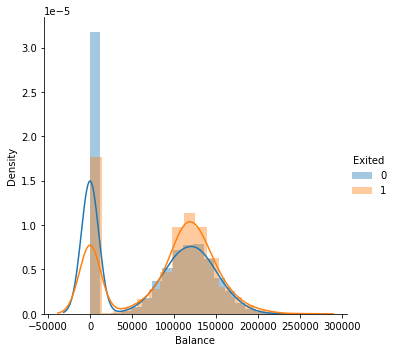

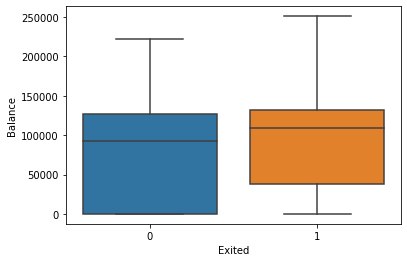

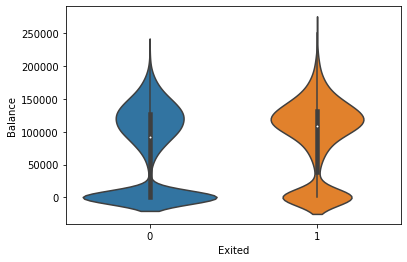

In [26]:
a=np.mean(df1.Balance)
print(a)
b=np.median(df1.Balance)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['Balance'],75)
print(c)
#75% of Tenure which belongs to the people who exited the bank lies below 126410.28
d=np.percentile(sb['Balance'],25)
print(d)
#25% of Tenure which belongs to the people who exited the bank lies below 38340.02
e=np.percentile(sb['Balance'],75)
print(e)
#75% of Tenure which belongs to the people who exited the bank lies below 131433.33
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Balance",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='Balance', data=df)
plt.show()

sns.violinplot(x='Exited',y='Balance', data=df)
plt.show()

**Observation**

75% of Tenure which belongs to the people who exited the bank lies below 126410.28

25% of Tenure which belongs to the people who exited the bank lies below 38340.02

75% of Tenure which belongs to the people who exited the bank lies below 131433.33


**Conclusion**

First plot is distplot is used to visualize the parametric distribution of a dataset.

Second plot is the box plot, from box plot also we are not able to distinguish class labels, all of them seems to have almost same 75th,25th and 75th percentile.

Third plot is violin plot, it is giving us individual class label distribution and percentiles associated with that class label, from violin plot also it is difficult to come up with any conclusion.

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


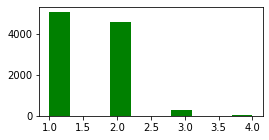

,Exited
NumOfProducts,
1,1409
2,348
3,220
4,60


In [27]:
count=df['NumOfProducts'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['NumOfProducts'],facecolor='g')
plt.show()
df1[['NumOfProducts','Exited']].groupby('NumOfProducts').sum()

In [28]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['NumOfProducts','Exited']].groupby('NumOfProducts').mean()

,Exited
NumOfProducts,
1,0.277144
2,0.075817
3,0.827068
4,1.000000


1.5302
1.0
2.0
1.0
2.0


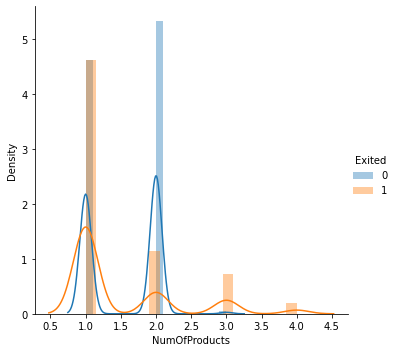

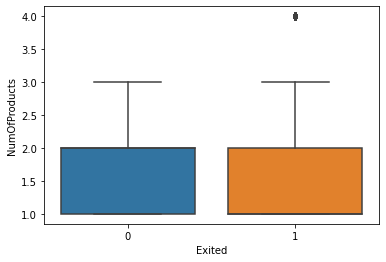

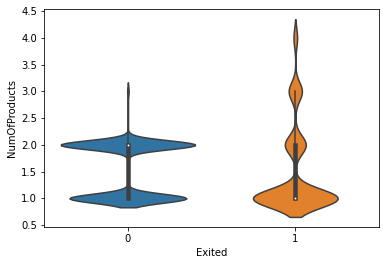

In [29]:
a=np.mean(df1.NumOfProducts)
print(a)
b=np.median(df1.NumOfProducts)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['NumOfProducts'],75)
print(c)
#75% of No.of Products which belongs to the people who exited the bank lies below 2
d=np.percentile(sb['NumOfProducts'],25)
print(d)
#25% of No.of Products which belongs to the people who exited the bank lies below 1
e=np.percentile(sb['NumOfProducts'],75)
print(e)
#75% of No.of Products which belongs to the people who exited the bank lies below 2
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "NumOfProducts",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='NumOfProducts', data=df)
plt.show()

sns.violinplot(x='Exited',y='NumOfProducts', data=df)
plt.show()

**Observation**

75% of Number of Products which belongs to the people who exited the bank lies below 2.0

25% of Number of Products which belongs to the people who exited the bank lies below 1.0

75% of Number of Products which belongs to the people who exited the bank lies below 2.0

1    7055
0    2945
Name: HasCrCard, dtype: int64


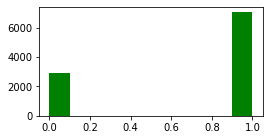

,Exited
HasCrCard,
0,613
1,1424


In [30]:
count=df['HasCrCard'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['HasCrCard'],facecolor='g')
plt.show()
df1[['HasCrCard','Exited']].groupby('HasCrCard').sum()

In [31]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['HasCrCard','Exited']].groupby('HasCrCard').mean()

,Exited
HasCrCard,
0,0.208149
1,0.201843


0.7055
1.0
1.0
0.0
1.0


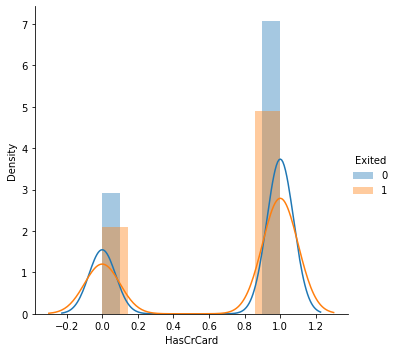

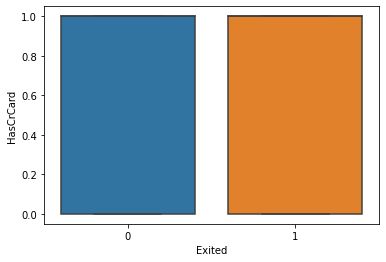

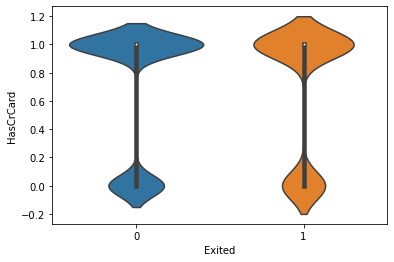

In [32]:
a=np.mean(df1.HasCrCard)
print(a)
b=np.median(df1.HasCrCard)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['HasCrCard'],75)
print(c)
#75% of having Credit card which belongs to the people who exited the bank lies below 1.0
d=np.percentile(sb['HasCrCard'],25)
print(d)
#25% of having Credit card which belongs to the people who exited the bank lies below 0.0
e=np.percentile(sb['HasCrCard'],75)
print(e)
#75% of having Credit card which belongs to the people who exited the bank lies below 1.0
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "HasCrCard",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='HasCrCard', data=df)
plt.show()

sns.violinplot(x='Exited',y='HasCrCard', data=df)
plt.show()

**Observation**

75% of has credit card which belongs to the people who exited the bank lies below 1.0

25% of has credit card which belongs to the people who exited the bank lies below 0.0

75% of has credit card which belongs to the people who exited the bank lies below 1.0

1    5151
0    4849
Name: IsActiveMember, dtype: int64


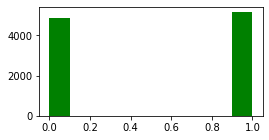

,Exited
IsActiveMember,
0,1302
1,735


In [33]:
count=df['IsActiveMember'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['IsActiveMember'],facecolor='g')
plt.show()
df1[['IsActiveMember','Exited']].groupby('IsActiveMember').sum()

In [34]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['IsActiveMember','Exited']].groupby('IsActiveMember').mean()

,Exited
IsActiveMember,
0,0.268509
1,0.142691


0.5151
1.0
1.0
0.0
1.0


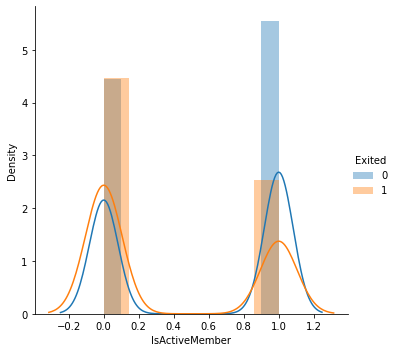

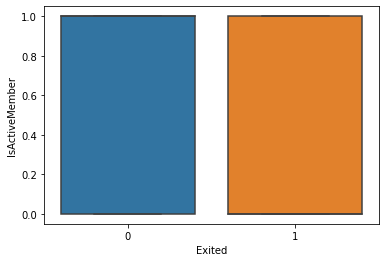

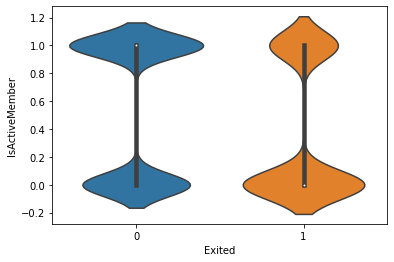

In [35]:
a=np.mean(df1.IsActiveMember)
print(a)
b=np.median(df1.IsActiveMember)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['IsActiveMember'],75)
print(c)
#75% of Active Member which belongs to the people who exited the bank lies below 1.0
d=np.percentile(sb['IsActiveMember'],25)
print(d)
#25% of Active Member which belongs to the people who exited the bank lies below 1.0
e=np.percentile(sb['IsActiveMember'],75)
print(e)
#75% of Active Member which belongs to the people who exited the bank lies below 1.0
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "IsActiveMember",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='IsActiveMember', data=df)
plt.show()

sns.violinplot(x='Exited',y='IsActiveMember', data=df)
plt.show()

**Observation**

75% of Active Member which belongs to the people who exited the bank lies below 1.0

25% of Active Member which belongs to the people who exited the bank lies below 0.0

75% of Active Member which belongs to the people who exited the bank lies below 1.0

24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64


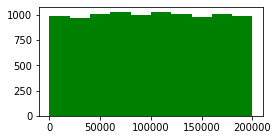

,Exited
EstimatedSalary,
11.58,1
90.07,0
91.75,1
96.27,0
106.67,0
...,...
199909.32,0
199929.17,0
199953.33,0


In [36]:
count=df['EstimatedSalary'].value_counts()
print(count)
plt.figure(figsize=(4,2))
plt.hist(df['EstimatedSalary'],facecolor='g')
plt.show()
df1[['EstimatedSalary','Exited']].groupby('EstimatedSalary').sum()

In [37]:
df1=df.replace([{'Exited':{'Yes':1,'No':0}}])
df1[['EstimatedSalary','Exited']].groupby('EstimatedSalary').mean()

,Exited
EstimatedSalary,
11.58,1
90.07,0
91.75,1
96.27,0
106.67,0
...,...
199909.32,0
199929.17,0
199953.33,0


From EDA and domain knowledge we got to know that out of 13 features only 5 are important features for recommendation.

In [84]:
#we took only important features which were used to derive rule based system
#data=df[['Exited','Age','Balance','NumOfProducts','HasCrCard']]
X=df[['Age','Balance','NumOfProducts','HasCrCard']]

100090.2398809998
100193.915
148609.95500000002
51907.72
152422.91


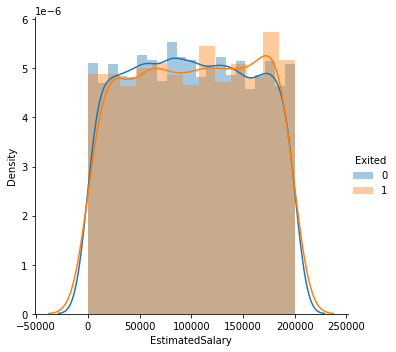

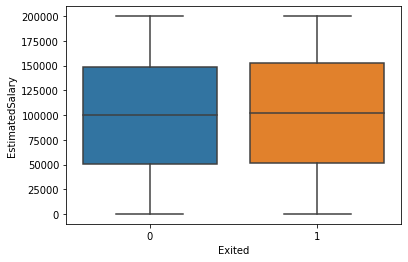

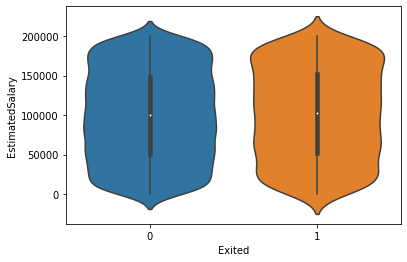

In [85]:
a=np.mean(df1.EstimatedSalary)
print(a)
b=np.median(df1.EstimatedSalary)
print(b)

sa=df.loc[df['Exited']==0]
sb=df.loc[df['Exited']==1]

c=np.percentile(sa['EstimatedSalary'],75)
print(c)
#75% of Estimated Salary which belongs to the people who exited the bank lies below 148609.95500000002
d=np.percentile(sb['EstimatedSalary'],25)
print(d)
#25% of Estimated Salary which belongs to the people who exited the bank lies below 51907.72
e=np.percentile(sb['EstimatedSalary'],75)
print(e)
#75% of Estimated Salary which belongs to the people who exited the bank lies below 152422.91
sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "EstimatedSalary",kde='True') \
   .add_legend()
plt.show()

sns.boxplot(x='Exited',y='EstimatedSalary', data=df)
plt.show()

sns.violinplot(x='Exited',y='EstimatedSalary', data=df)
plt.show()

Observation

75% of Estimated Salary which belongs to the people who exited the bank lies below 148609.95500000002

25% of Estimated Salary which belongs to the people who exited the bank lies below 51907.72

75% of Estimated Salary which belongs to the people who exited the bank lies below 152422.91

# Conclusion of Data Analysis 

see all the variables in detail and found some features like Age,Balance, NumOfProduct,HasCrCard to be very useful and some like Gender,IsActiveMember are not at all useful. We will remove features which do not add any value to the churning.

In [86]:
#Removing non-useful features
X=df.drop(['CustomerId','Surname','CreditScore','Geography','Gender','Tenure','IsActiveMember','EstimatedSalary'],axis=1)

# DATA PREPROCESSING

1.In this we will label the data, scale the numerical features because some algorithms like logistic regression works good when standardized.

2.We will also balance the data if neccessary

In [87]:
#catagorial=['Geography','Gender']#convert catagorial feature into nemerical feature
#X=pd.get_dummies(data,columns=catagorial,drop_first=True)

In [88]:
scaling = MinMaxScaler()
bal = scaling.fit_transform(df[['Balance']])
est = scaling.fit_transform(df[['EstimatedSalary']])
Ten= scaling.fit_transform(df[['Tenure']])
cr = scaling.fit_transform(df[['CreditScore']])
X['Balance'] = bal
X['EstimatedSalary'] = est
X['Tenure'] = Ten
X['CreditScore'] = cr

In [89]:
X.head()

,RowNumber,Age,Balance,NumOfProducts,HasCrCard,Exited,EstimatedSalary,Tenure,CreditScore
0,1,42,0.000000,1,1,1,0.506735,0.2,0.538
1,2,41,0.334031,1,0,0,0.562709,0.1,0.516
2,3,42,0.636357,3,1,1,0.569654,0.8,0.304
3,4,39,0.000000,2,0,0,0.469120,0.1,0.698
4,5,43,0.500246,1,1,0,0.395400,0.2,1.000


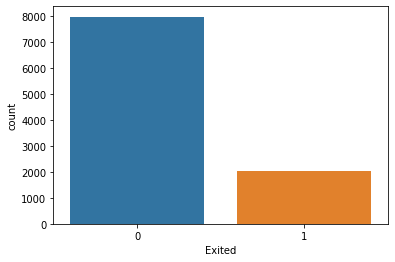

0    7963
1    2037
Name: Exited, dtype: int64

In [90]:
#lets check whether data is balanced or imbalanced
import seaborn as sns
sns.countplot(x = 'Exited', data = df)
plt.show()
#to be exact, lets find out the number

df['Exited'].value_counts()

In [91]:
X.columns


Index(['RowNumber', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'Exited',
       'EstimatedSalary', 'Tenure', 'CreditScore'],
      dtype='object')

There is a definitely a imbalance of data, We need to address this problem before moving further.

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Balance          10000 non-null  float64
 3   NumOfProducts    10000 non-null  int64  
 4   HasCrCard        10000 non-null  int64  
 5   Exited           10000 non-null  int64  
 6   EstimatedSalary  10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   CreditScore      10000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 703.2 KB


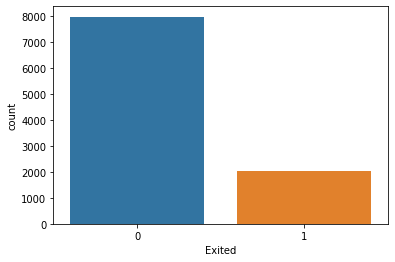

0    7963
1    2037
Name: Exited, dtype: int64

In [93]:
#lets check whether data is balanced or imbalanced
import seaborn as sns
sns.countplot('Exited', data=X)
plt.show()
#to be exact, lets find out the number

X['Exited'].value_counts()

In [94]:
#upsampling of data

no_churn=X[X['Exited']==0]
yes_churn=X[X['Exited']==1]
upsampled = yes_churn.sample(n=len(no_churn), replace=True)
X1 = no_churn.append(upsampled).reset_index(drop=True)
print(upsampled.shape)
X1.shape

X1.head()

(7963, 9)


,RowNumber,Age,Balance,NumOfProducts,HasCrCard,Exited,EstimatedSalary,Tenure,CreditScore
0,2,41,0.334031,1,0,0,0.562709,0.1,0.516
1,4,39,0.000000,2,0,0,0.469120,0.1,0.698
2,5,43,0.500246,1,1,0,0.395400,0.2,1.000
3,7,50,0.000000,2,1,0,0.050261,0.7,0.944
4,9,44,0.566170,2,0,0,0.374680,0.4,0.302


There is a definitely a imbalance of data, We need to address this problem before moving further.

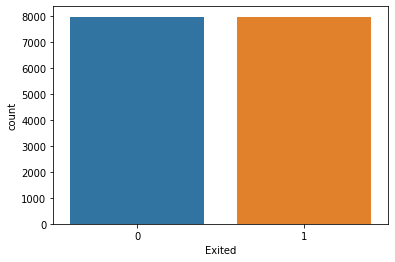

In [95]:
sns.countplot('Exited', data=X1)
plt.show()

**Observation**

Data becomes balanced now.

# MODEL TRAINING

Since we have a binary classification problem, we have some algorithms which we can try and see what works best.

Logistic Regression-

Works fairly well on binary classification problem, In Logistic regression we minimize (Logloss and Regularization term) and find the w(weight) vector which minimizes the sum of (logloss and regularization term) over all the data points.

Assumption of LR assumption is that we assume classes in logistic regression are linearly seperable.

Train time complexity at training time- o(n*d), n is number of data points, d is number of features/dimensions.

Run time complexity at run time- o(d), d is the number of features/dimensions.

In [96]:
#  catagorial=['Surname','Geography','Gender']#convert catagorial feature into numerical feature
# X=pd.get_dummies(df,columns=catagorial,drop_first=True)

In [97]:

x2=X1.drop('Exited',axis=1)

y2=X1['Exited']

**MODEL TRAINING, EVALUATION AND HYPERPARAMETER TUNING**

---



**KNN(K nearest neighbor)**

In [98]:
# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Create KNN classifier

tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,tuned_parameters,scoring='f1_weighted')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print(modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=3)
0.7678440684029614


In [99]:
knn_test_prediction=modelknn.predict(X_test)
knn_train_predictions=modelknn.predict(X_train)

In [56]:
#evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction,average='weighted')
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions,average='weighted')
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

print('\n precision for test:', precision_score(y_test,knn_test_prediction))
print('\n precision for train:', precision_score(y_train,knn_train_predictions))
 
print('\n Recall for test:', recall_score(y_test,knn_test_prediction))
print('\n Recall for train:', recall_score(y_train,knn_train_predictions))

Testing f1 score is 0.7679801262097354
Training f1 score is 0.8928973476745945

 precision for test: 0.7147260273972603

 precision for train: 0.8413506012950971

 Recall for test: 0.8884631758194976

 Recall for train: 0.9720342002137513


**Knn observation**

Knn is giving us very good results, we are getting around 76% f1 score on test data.

**Logistic Regression**


In [57]:
# LOGISTIC REGRESSION
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.2, random_state=50)

model=GridSearchCV(LogisticRegression(max_iter=600),tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

LogisticRegression(C=0.01, max_iter=600)
0.6577025450063301


In [58]:
print(y_test.shape)
print(y_train.shape)

(3186,)
(12740,)


In [59]:
lrmodel=LogisticRegression(C=1, max_iter=600)

lrmodel.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=600)

In [60]:
LR_test_prediction=lrmodel.predict(X_test)
LR_train_predictions=lrmodel.predict(X_train)

In [61]:
#evaluation of Logistic Regression 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_lrtest_F1score=f1_score(y_test,LR_test_prediction,average='weighted')
print("Testing f1 score is",X_lrtest_F1score) #f1 score on test data

X_lrtrain_F1score=f1_score(y_train,LR_train_predictions,average='weighted')
print("Training f1 score is",X_lrtrain_F1score) #f1 score on train data

print('\n precision for test:', precision_score(y_test,LR_test_prediction))
print('\n precision for train:', precision_score(y_train,LR_train_predictions))
 
print('\n Recall for test:', recall_score(y_test,LR_test_prediction))
print('\n Recall for train:', recall_score(y_train,LR_train_predictions))

Testing f1 score is 0.6749482852235499
Training f1 score is 0.6883905334788953

 precision for test: 0.6565079365079365

 precision for train: 0.6929824561403509

 Recall for test: 0.6762589928057554

 Recall for train: 0.6875971401927261


**LR observation**

We got around 67% f1 score on test data which is not very good, let's try some other algorithm

**Decision Tree Claasifier**

In [62]:
dt_test_prediction=model.predict(X_test)
dt_train_predictions=model.predict(X_train)

In [63]:
#decision tree classifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))
# print('\n precision for test:', precision_score(y_test,dt_test_prediction))
# print('\n precision for train:', precision_score(y_train,dt_train_predictions))
 
# print('\n Recall for test:', recall_score(y_test,dt_test_prediction))
# print('\n Recall for train:', recall_score(y_train,dt_train_predictions))


DecisionTreeClassifier(max_depth=6, min_samples_split=5)
0.7677414030307925
0.7760221446681067


**Observation**

Here i got 78% accuracy when maxdepth is 6, lets see if i increase max depth

In [64]:
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[5,8,10]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

# print('\n precision for test:', precision_score(y_test,dt_test_prediction))
# print('\n precision for train:', precision_score(y_train,dt_train_predictions))
 
# print('\n Recall for test:', recall_score(y_test,dt_test_prediction))
# print('\n Recall for train:', recall_score(y_train,dt_train_predictions))

DecisionTreeClassifier(max_depth=10, min_samples_split=5)
0.7957438532208525
0.8364750034364209


Increasing maxdepth is increasing accuracy and that simply means model is getting overfit

**Decision Tree observation**


With depth 6, we were getting f1 score of 79% on test data.

With depth 10, we are getting f1 score of 83% on test data.

**Random Forest**

In [65]:
#let's use RANDOM FOREST classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier() 
tuned_parameters1=[{'n_estimators':[100,200,300]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.4, random_state=50)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1_weighted')

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))

RandomForestClassifier(n_estimators=300)
0.9229631527696814


In [66]:
lf_test_prediction=model.predict(X_test)
lf_train_predictions=model.predict(X_train)

In [67]:
#evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
clf1=f1_score(y_test,lf_test_prediction,average='weighted')
print("Testing f1 score is",clf1) #f1 score on test data

clf1=f1_score(y_train,lf_train_predictions,average='weighted')
print("Training f1 score is",clf1) #f1 score on train data
print('\n precision for test:', precision_score(y_test,lf_test_prediction))
print('\n precision for Train:', precision_score(y_train,lf_train_predictions))
 
print('\n Recall for test:', recall_score(y_test,lf_test_prediction))
print('\n Recall for Train:', recall_score(y_train,lf_train_predictions))

Testing f1 score is 0.9229631527696814
Training f1 score is 1.0

 precision for test: 0.8913738019169329

 precision for Train: 1.0

 Recall for test: 0.9635792778649922

 Recall for Train: 1.0


Random Forest works fairly well on the dataset, We got an accuracy of 94% that is very good.

**observation**

We got an amazing weighted f1 score i.e 92%, this seems that we could have more data to validate this high percentage

In [68]:
#lets predict for the test data
print(X_test[0:1])

print(model.predict(X_test[0:1]))

      RowNumber  Age   Balance  ...  EstimatedSalary  Tenure  CreditScore
8613        495   38  0.677813  ...         0.674513     0.2        0.646

[1 rows x 8 columns]
[1]


SVM

In [69]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3, random_state=50)
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted',cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=0.1)
0.5041249813892992


In [70]:
svm_test_prediction=smodel.predict(X_test)
svm_train_predictions=smodel.predict(X_train)

In [71]:
#evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_svmtest_F1score=f1_score(y_test,svm_test_prediction,average='weighted')
print("Testing f1 score is",X_svmtest_F1score) #f1 score on test data

X_svmtrain_F1score=f1_score(y_train,svm_train_predictions,average='weighted')
print("Training f1 score is",X_svmtrain_F1score) #f1 score on train data
print('\n precision for test:', precision_score(y_test,svm_test_prediction))
print('\n precision for test:', precision_score(y_train,svm_train_predictions))
 
print('\n Recall for test:', recall_score(y_test,svm_test_prediction))
print('\n Recall for test:', recall_score(y_train,svm_train_predictions))

Testing f1 score is 0.5041249813892992
Training f1 score is 0.5105559044795903

 precision for test: 0.49795615013006317

 precision for test: 0.5143129770992366

 Recall for test: 0.5704555129842486

 Recall for test: 0.5760598503740648


**SVM observation**

We are getting testing f1 score of 53% which is less then k nearestneighbour.

In [72]:
y_pred=smodel.predict(X_test)



In [73]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [74]:
print(confusion_matrix)


[[1078 1351]
 [1009 1340]]


In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.44      0.48      2429
           1       0.50      0.57      0.53      2349

    accuracy                           0.51      4778
   macro avg       0.51      0.51      0.50      4778
weighted avg       0.51      0.51      0.50      4778



In [76]:
from prettytable import PrettyTable
columns=(["ALGORITHM","Accuracy","F1_Score","Precision","Recall"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["Logistic Regression","KNN","decision tree", "random forest","SVM"])
myTable.add_column(columns[1], ["67%","76%","75%","91%","52%"])
myTable.add_column(columns[2], ["66% ","76%","75%","92%","53%"])
myTable.add_column(columns[3], ["65% ","71%","88%","89%","52%"])
myTable.add_column(columns[4], ["65% ","88%","96%","96%","71%"])

print(myTable)

+---------------------+----------+----------+-----------+--------+
|      ALGORITHM      | Accuracy | F1_Score | Precision | Recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   67%    |   66%    |    65%    |  65%   |
|         KNN         |   76%    |   76%    |    71%    |  88%   |
|    decision tree    |   75%    |   75%    |    88%    |  96%   |
|    random forest    |   91%    |   92%    |    89%    |  96%   |
|         SVM         |   52%    |   53%    |    52%    |  71%   |
+---------------------+----------+----------+-----------+--------+


**Conclusion**

Random forest and Knn have good f1_weighted score but random forest is an ensemble technique, knn is a simple nearest neigbour technique so KNN would be a better choice, why use a complex technique when a simple technique is working fine for us.

**Retraining of Model**

We can do retraining every month or every 3 months according to the results of the retraining.

Let's say we had extracted data till (1st august 2021) and built a model over that, now on september 1st 2021, we again will have a data for one month, we will extract this data and will retrain on the whole data(till 1st/september/2021).We can retrain Random Forest, Logistic Regression, KNN on this data and see how results vary from last trained results.

While Retraining we need to follow the same process which we used while training the models except for the data, However if using some feature transformation can improve the results then it is always a good idea.

**END OF THE PROJECT**